In [ ]:
# SUPERVISED LEARNING ALGORITHM
# ONE-HOT ENCODING (0,1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/\
                 1st_june_data_science/master/customer_satisfaction/\
                 cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

# 1lakh + records
# 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.shape

(103904, 12)

In [5]:
df.duplicated().sum()

# duplicate checkout
# 1 record will be duplicate if the full row is identical

172

In [6]:
# missing value
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [7]:
df.dropna(inplace=True)

# axis by default is 0
# I am going to delete all those rows that contains missing value
# because 310 is a very small data 
# we have 1 lakh+ rows

In [8]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [9]:
male = df[df['Gender']=='Male']
female = df[df['Gender']=='Female']

In [10]:
female.shape

(52576, 12)

In [11]:
male.shape

(51018, 12)

In [12]:
female['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    30107
satisfied                  22469
Name: count, dtype: int64

In [13]:
male['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    28590
satisfied                  22428
Name: count, dtype: int64

In [14]:
female

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103893,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,58,296,3,3,1,0,29.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103897,Female,Loyal Customer,Business travel,Business,satisfied,60,1599,4,4,4,9,7.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0


In [15]:
female['Type of Travel'].value_counts()

Type of Travel
Business travel    36433
Personal Travel    16143
Name: count, dtype: int64

In [16]:
male['Type of Travel'].value_counts()

Type of Travel
Business travel    35032
Personal Travel    15986
Name: count, dtype: int64

In [17]:
female['Class'].value_counts()

Class
Business    24868
Eco         23776
Eco Plus     3932
Name: count, dtype: int64

In [18]:
male['Class'].value_counts()

Class
Business    24665
Eco         22817
Eco Plus     3536
Name: count, dtype: int64

In [19]:
female

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103893,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,58,296,3,3,1,0,29.0
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,24,1055,1,5,1,13,10.0
103897,Female,Loyal Customer,Business travel,Business,satisfied,60,1599,4,4,4,9,7.0
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0


In [20]:
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [21]:
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [22]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


<Axes: xlabel='Customer Type', ylabel='count'>

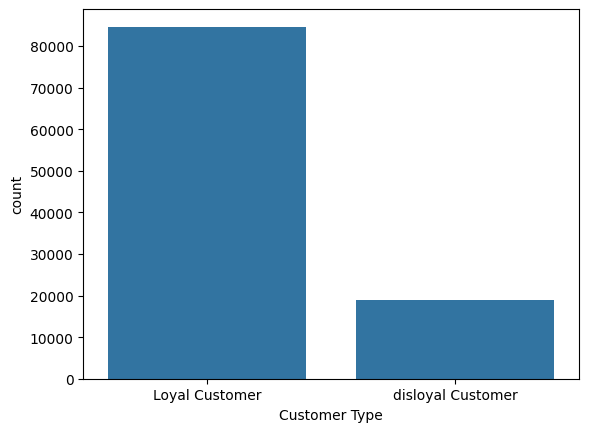

In [23]:
#sns.catplot(x='Customer Type',y='',data=df)

# DATA VISUALISATION
# ANALYSING DATA USING GRAPHS

sns.countplot(x='Customer Type',data=df)

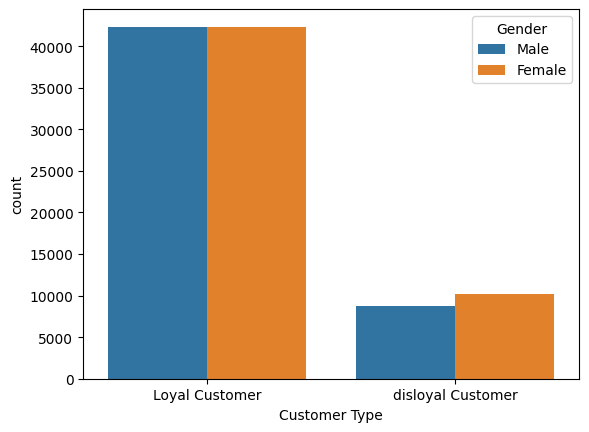

In [24]:
sns.countplot(x='Customer Type',data=df,hue='Gender')
plt.show()

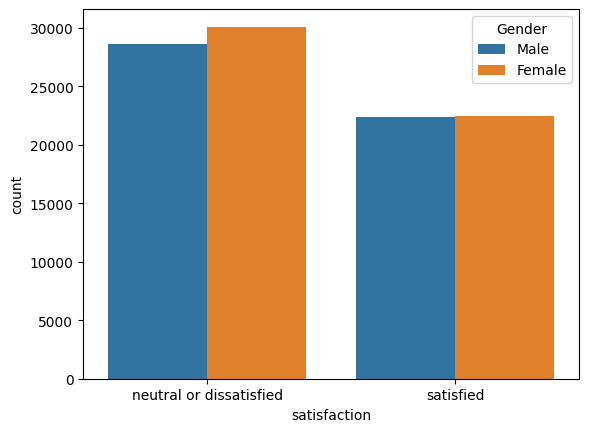

In [25]:
sns.countplot(x='satisfaction',data=df,hue='Gender')
plt.show()

In [26]:
# satisfied customers are less (both male and female)

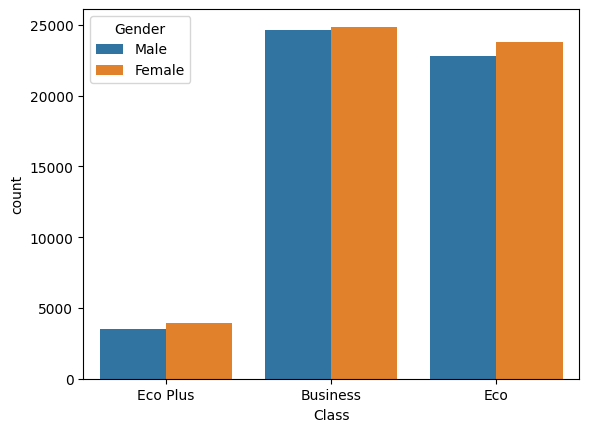

In [27]:
sns.countplot(x='Class',data=df,hue='Gender')
plt.show()

In [28]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


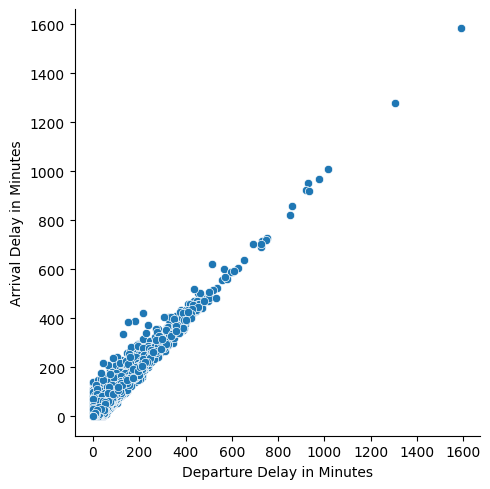

In [29]:
sns.relplot(x='Departure Delay in Minutes',\
            y='Arrival Delay in Minutes',data=df)
plt.show()

# +ve relationship (or linear relationship)

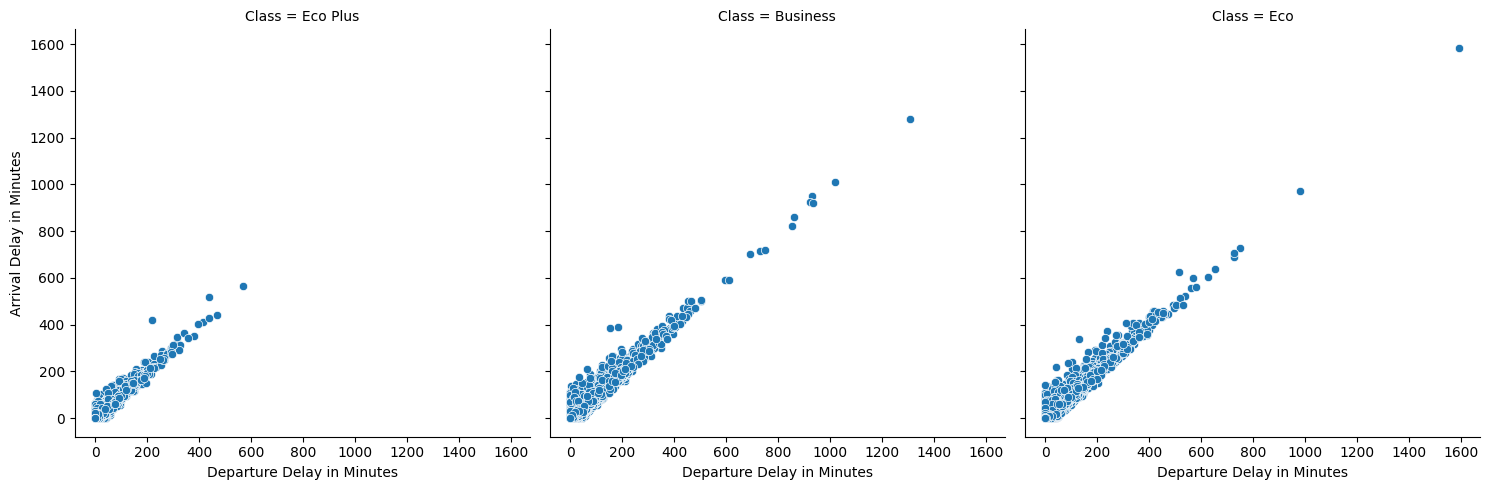

In [30]:
sns.relplot(x='Departure Delay in Minutes',\
            y='Arrival Delay in Minutes',data=df,col='Class')
plt.show()

In [31]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [32]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

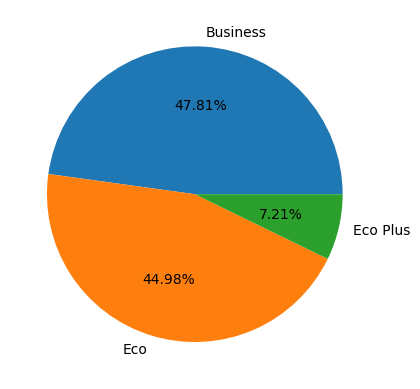

In [33]:
# Analysing using pie charts

l1 = ['Business','Eco','Eco Plus']
l2 = [49533,46593,7468]
plt.pie(l2,labels=l1,autopct='%2.2f%%')
plt.show()

In [34]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [35]:
df['Age'].min()
# Min Age

7

In [36]:
df['Age'].max()
# Max age

85

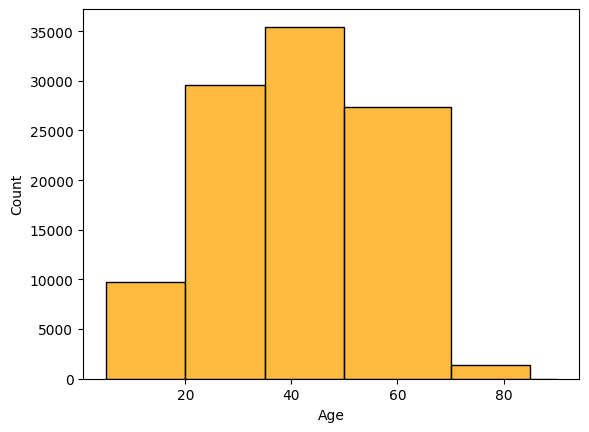

In [37]:
sns.histplot(df['Age'],bins=[5,20,35,50,70,85,90],color='orange')
plt.show()

In [38]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


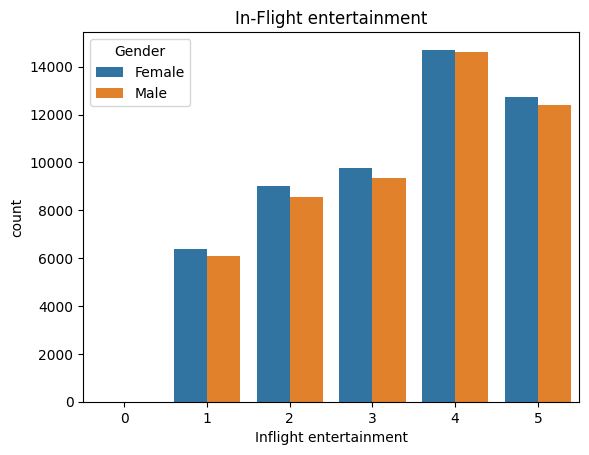

In [39]:
sns.countplot(x='Inflight entertainment',data=df,hue='Gender')
plt.title('In-Flight entertainment')
plt.show()

# analysis on inflight entertainment

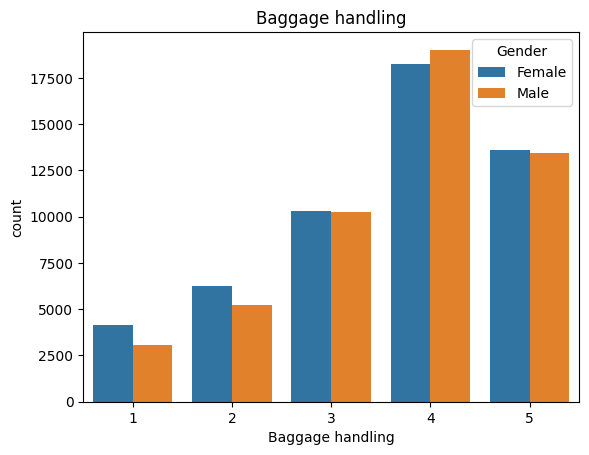

In [40]:
sns.countplot(x='Baggage handling',data=df,hue='Gender')
plt.title('Baggage handling')
plt.show()

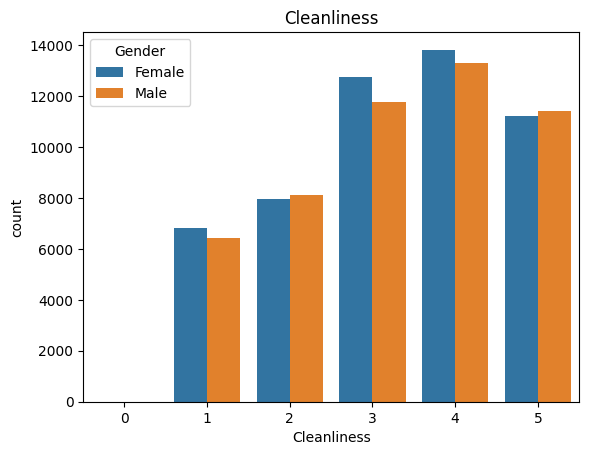

In [41]:
sns.countplot(x='Cleanliness',data=df,hue='Gender')
plt.title('Cleanliness')
plt.show()

In [42]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


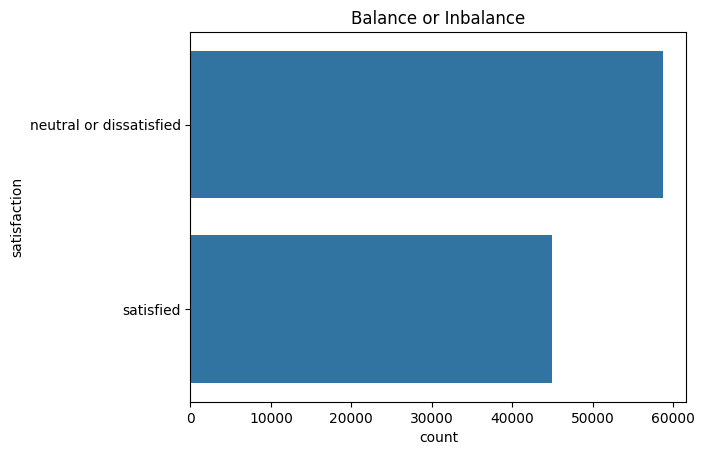

In [43]:
# is data balance or data is inbalance??
# we need to answer this in the classification model

# Data should be balance in classification model otherwise 
# prediction model will fail


sns.countplot(df['satisfaction'])
plt.title('Balance or Inbalance')
plt.show()

In [44]:
df['satisfaction'].value_counts()

# Data is balanced
# 60:40 ratio is allowed

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [45]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [46]:
#from sklearn.preprocessing import LabelE

In [47]:
# one hot encoding
# representing values in the form of 0 and 1

pd.get_dummies(df)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18.0,False,True,True,False,False,True,False,False,True,True,False
1,25,235,1,3,1,1,6.0,False,True,False,True,True,False,True,False,False,True,False
2,26,1142,5,4,5,0,0.0,True,False,True,False,True,False,True,False,False,False,True
3,25,562,2,3,2,11,9.0,True,False,True,False,True,False,True,False,False,True,False
4,61,214,3,4,3,0,0.0,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0.0,True,False,False,True,True,False,False,True,False,True,False
103900,49,2347,5,5,4,0,0.0,False,True,True,False,True,False,True,False,False,False,True
103901,30,1995,4,4,4,7,14.0,False,True,False,True,True,False,True,False,False,True,False
103902,22,1000,1,1,1,0,0.0,True,False,False,True,True,False,False,True,False,True,False


In [48]:
# we don't need boolean values
# we want data in the form of 0 and 1

pd.get_dummies(df).astype(int)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18,0,1,1,0,0,1,0,0,1,1,0
1,25,235,1,3,1,1,6,0,1,0,1,1,0,1,0,0,1,0
2,26,1142,5,4,5,0,0,1,0,1,0,1,0,1,0,0,0,1
3,25,562,2,3,2,11,9,1,0,1,0,1,0,1,0,0,1,0
4,61,214,3,4,3,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,1,0,0,1,1,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,0,1,1,0,1,0,1,0,0,0,1
103901,30,1995,4,4,4,7,14,0,1,0,1,1,0,1,0,0,1,0
103902,22,1000,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0


In [49]:
# false = 0
# true = 1

In [50]:
df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)
# it will drop first column

In [51]:
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [52]:
df2.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [53]:
df2.isnull().sum()

# making sure one more time whether any data is null or not

Age                                0
Flight Distance                    0
Inflight entertainment             0
Baggage handling                   0
Cleanliness                        0
Departure Delay in Minutes         0
Arrival Delay in Minutes           0
Gender_Male                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
Class_Eco                          0
Class_Eco Plus                     0
satisfaction_satisfied             0
dtype: int64

In [54]:
# y variable (or y column) is satisfaction
# other columns are x variables

In [55]:
# x and y split, independent and dependent variables

x = df2.drop('satisfaction_satisfied',axis='columns')   
# independent variables

y = df2[['satisfaction_satisfied']]   
# target variable

In [56]:
# training and testing split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression--> this algorithm is used to solve 
# ONLY for the classification problem statements

In [58]:
lgr = LogisticRegression()    # creating object

In [59]:
#train the algorithm

lgr.fit(x_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# if you want to ignore these warnings

#    import warnings
#    warnings.filterwarnings('ignore')

In [61]:
print('Training score: ',lgr.score(x_train,y_train)*100)
print('Testing score: ',lgr.score(x_test,y_test)*100)

Training score:  78.7921568627451
Testing score:  79.06269607606544


In [62]:
# difference is almost same
# but the score is low

In [63]:
## 78%

pred = lgr.predict(x_test)

In [64]:
x_test.shape

(20719, 12)

In [65]:
pred

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
y_test['prediction'] = pred   

# in y_test there are actual values
# we are adding one more column (predicted column) to y_test
# so that we can compare actual and predicted values

In [67]:
# actual value should be equal to predicted value

In [68]:
y_test.head(40)

,satisfaction_satisfied,prediction
67033,0,0
78369,0,0
101530,0,0
30857,0,0
86017,0,0
4223,0,1
46787,0,0
95747,0,1
51718,0,1
1633,1,0


In [69]:
y_test.shape

(20719, 2)

In [70]:
x_train

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
78691,56,1765,4,4,3,0,0,1,0,0,0,0
19758,52,1997,4,4,4,0,0,0,0,0,0,0
22046,56,1136,5,5,3,8,0,0,0,1,1,0
21965,48,2311,5,5,3,8,12,0,0,0,0,0
27321,41,337,1,4,1,9,7,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29649,35,1208,5,3,5,0,0,0,0,1,1,0
75717,47,802,3,5,3,139,149,1,0,1,1,0
72307,50,692,3,3,1,15,5,0,0,1,1,0
98863,34,725,4,4,4,45,63,1,0,0,0,0


In [71]:
# model evaluation phase
# we are now testing our model

from sklearn.metrics import confusion_matrix, classification_report

In [72]:
# we cannot count so many rows, so we use confusion matrix
# confusion_matrix(actual_value, prediction_value)

matrix = confusion_matrix(y_test['satisfaction_satisfied'],\
                          y_test['prediction'])
matrix

array([[9264, 2318],
       [2020, 7117]], dtype=int64)

In [1]:
# it is a 2-D numpy array

# array([[True +ve, False +ve],
#        [False -ve, True -ve]])

# TP ---> Actual True, Predicted True    {1 = 1}
# TN ---> Actual False, Predicted False  {0 = 0}
# FP ---> Actual False, Predicted True   {0 = 1}
# FN ---> Actual True, Predicted False   {1 = 0}

<Axes: >

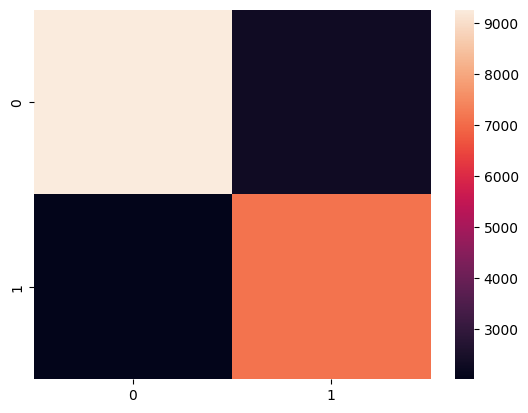

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrix)

<Axes: >

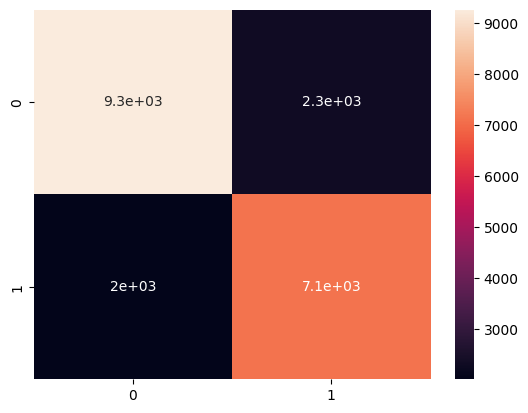

In [75]:
sns.heatmap(matrix,annot=True)

# annot is annotation

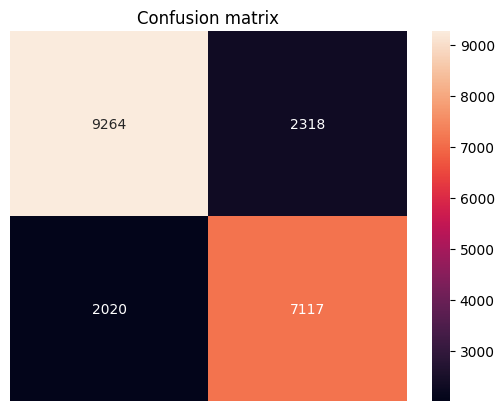

In [76]:
# Analysing confusion matrix using heatmap

sns.heatmap(matrix,annot=True,fmt='d')  # d --> decimal values
plt.title('Confusion matrix')
plt.axis('off')    # if we dont want any axes
plt.show()

In [77]:
# confusion matrix provides us a clear cut idea about our 
# performance model

In [78]:
import os, joblib
os.makedirs('models',exist_ok=True)
joblib.dump(lgr,'./models/logisticregre.lb')
print('Your model is saved!')

# to save our model

Your model is saved!


In [79]:
print(classification_report(y_test['satisfaction_satisfied'],\
                            y_test['prediction']))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     11582
           1       0.75      0.78      0.77      9137

    accuracy                           0.79     20719
   macro avg       0.79      0.79      0.79     20719
weighted avg       0.79      0.79      0.79     20719



In [80]:
# Try with decision tree and random forest

# Decision Tree -> algorithm which can be used both in Regression 
# and classification (preferred in classification)

# Random Forest -> algorithm which can be used both in Regression 
# and classification (preferred in both)

In [81]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [82]:
dtc = DecisionTreeClassifier()
rdf = RandomForestClassifier()

In [83]:
# training algorithms
dtc.fit(x_train,y_train)
rdf.fit(x_train,y_train)
print('Your algorithms is trained!')

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Your algorithms is trained!


In [84]:
y_test.head()

# there is one more extra column in y_test (i.e., prediction)

,satisfaction_satisfied,prediction
67033,0,0
78369,0,0
101530,0,0
30857,0,0
86017,0,0


In [85]:
print("Decision tree score ") 
print("Training score: ",dtc.score(x_train,y_train)*100)
print("Testing score: " ,dtc.score(x_test,\
                                   y_test['satisfaction_satisfied'])*100)


print()
print('Randomforest Score ')
print("Training score: ",rdf.score(x_train,y_train)*100)
print("Testing score: " ,rdf.score(x_test,\
                                   y_test['satisfaction_satisfied'])*100)


Decision tree score 
Training score :  99.96983408748115
Testing score :  81.23944205801439

Randomforest Score 
Training score :  99.96862745098039
Testing score :  86.91056518171727


In [86]:
# random forest is more upgraded and advanced version of decision tree

# decision tree model is overfit
# training score of decision tree is more than the testing score

# difference should not be more than 5 
# otherwise error rate will increase

# Both the algorithms are overfit

# but random forest is better because the difference of training 
# and testing score is less..

In [87]:
# saving our models

import os,joblib
os.makedirs('models',exist_ok=True)
joblib.dump(dtc,'./models/decisiontree.lb')
joblib.dump(rdf,'./models/randomforest.lb')
print('your model is saved!')

your model is saved!


In [88]:
# hyperparameter tuning
# it is used to improve accuracy & to solve overfit/underfit problems
# changing the default parameters

rdf2 = RandomForestClassifier(n_estimators=85,max_depth=14,\
                              min_samples_split=40)   

# if we want to change the default parameters

# if we want to read the documentation, then go to:
#         RandomForestClassifier sklearn on google

In [89]:
rdf2.fit(x_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=14, min_samples_split=40, n_estimators=85)

In [90]:
print('Randomforest Score ')
print("Training score: ",rdf2.score(x_train,y_train)*100)
print("Testing score: ",rdf2.score(x_test,\
                                   y_test['satisfaction_satisfied'])*100)

# generalised model
# neither overfit nor underfit

# Score is a bit low than before but hyper-parameter tuning has
# solved underfit/overfit problem... and therefore it'll improve
# our accuracy

# If our model is not a generalised model, meaning that if our 
# model is either overfit or underfit, then error rate will increase.

Randomforest Score 
Training score :  88.76018099547511
Testing score :  87.82277136927458


In [91]:
# HYPERPARAMETER TUNING----
# HOW TO FIND OUT THE OPTIMAL PARAMETERS:--
# instead of providing a single parameters, we'll pass a range

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rdf3 = RandomForestClassifier()  

# object created with default parameter

In [94]:
# defining range
parameters = {'n_estimators':[85,95,120,155],       # 4
              'max_depth':[10,15,20,25],            # 4
              'min_samples_split':[40,30,50]}       # 3

# instead of using list, we can also use range(start,stop)
# Example: - {'n_estimators':range(80,150)}

gridsearchcv = GridSearchCV(estimator=rdf3,param_grid=parameters)

# it'll perform combination of 4*4*3 = 48

# 48 number of algorithms will be trained by the GridSearchCV
# and it will pick the algorithm with the highest accuracy

# possible combinations = 48

In [95]:
gridsearchcv.fit(x_train,y_train)

# this cell will take crazy amount of time to execute because 
# it will train multiple combinations... (around 30-40 mins)

# this is randomforest only but GridSearchCV will find out 
# the optimal combination of parameters with highest giving accuracy

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionW

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [40, 30, 50],
                         'n_estimators': [85, 95, 120, 155]})

In [97]:
gridsearchcv.best_params_

{'max_depth': 15, 'min_samples_split': 30, 'n_estimators': 95}

In [98]:
# these are the optimal parameters with the highest accuracy

In [99]:
rd4 = RandomForestClassifier(max_depth=15,min_samples_split=30,\
                             n_estimators=95)

In [100]:
rd4.fit(x_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, min_samples_split=30, n_estimators=95)

In [101]:
print('Randomforest Score ')
print("Training score: ",rd4.score(x_train,y_train)*100)
print("Testing score: ",rd4.score(x_test,\
                                  y_test['satisfaction_satisfied'])*100)


Randomforest Score 
Training score :  89.06546003016591
Testing score :  87.95308653892563
